<a href="https://colab.research.google.com/github/leonardoLavagna/tesla-stock-and-revenues-analysis/blob/main/Tesla_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla_stock_price_prediction

## Set up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

## Data

In [6]:
df = pd.read_csv('TSLA.csv')

In [7]:
# To make it as simple as possible we will focus on the “open” price variable

df = df['Open'].values
df = df.reshape(-1, 1)

## Model

In [8]:
# training and testing sets

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [9]:
# normalization

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [10]:
# Auxiliary function

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

For the features (x), we will always append the last 50 prices, and for the label (y), we will append the next price. Then we will use numpy to convert it into an array.

Now we are going to create our training and testing data by calling our function for each one.

In [11]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [12]:
# Reshaping 

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [13]:
# Neural network 

model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [14]:
# Reshaping

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
# Model actualization

model.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
# Model Training

model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
59/59 [==============================] - 21s 181ms/step - loss: 0.0113
Epoch 2/50
59/59 [==============================] - 19s 321ms/step - loss: 0.0034
Epoch 3/50
59/59 [==============================] - 12s 198ms/step - loss: 0.0031
Epoch 4/50
59/59 [==============================] - 11s 179ms/step - loss: 0.0028
Epoch 5/50
59/59 [==============================] - 11s 182ms/step - loss: 0.0026
Epoch 6/50
59/59 [==============================] - 10s 178ms/step - loss: 0.0028
Epoch 7/50
59/59 [==============================] - 11s 185ms/step - loss: 0.0027
Epoch 8/50
59/59 [==============================] - 12s 210ms/step - loss: 0.0025
Epoch 9/50
59/59 [==============================] - 11s 180ms/step - loss: 0.0024
Epoch 10/50
59/59 [==============================] - 12s 206ms/step - loss: 0.0023
Epoch 11/50
59/59 [==============================] - 16s 275ms/step - loss: 0.0022
Epoch 12/50
59/59 [==============================] - 15s 258ms/step - loss: 0.0019
Epoch 13/50
5

In [17]:
model = load_model('stock_prediction.h5')

## Results

14/14 [==============================] - 3s 55ms/step


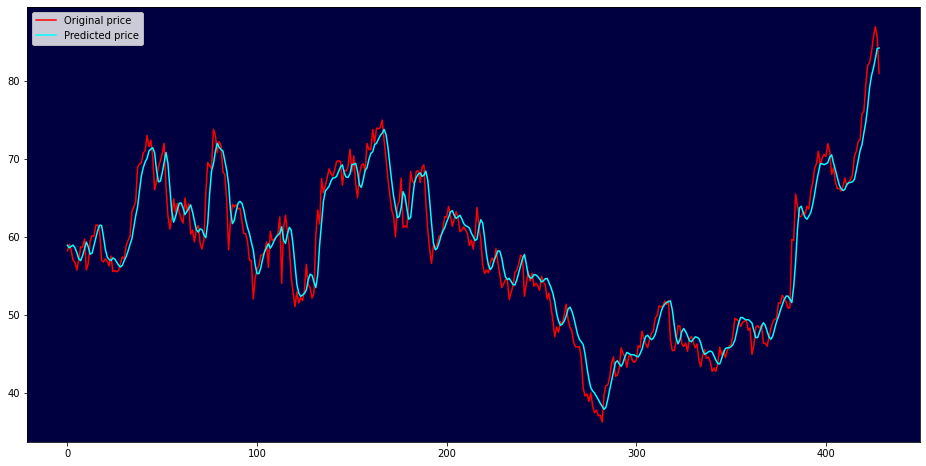

In [18]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()